In [1]:
from plot_utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./data/ep_or_tp.csv')

df = df[(df["Batch Size"] >=16 )| (df["Batch Size"].isna())]

In [3]:
df['Model Name'].unique()

array(['mistralai/Mixtral-8x7B-Instruct-v0.1',
       'meta-llama/Llama-3.3-70B-Instruct',
       'mistralai/Mixtral-8x22B-Instruct-v0.1',
       'Qwen/Qwen3-235B-A22B-FP8', 'deepseek-ai/DeepSeek-R1-0528',
       'meta-llama/Llama-4-Scout-17B-16E-Instruct'], dtype=object)

In [4]:
process(df)

df = remove_duplicates_and_sort(df)

Before pruning:  183
After pruning:  134


In [5]:
for hw in df['Hardware type'].unique():
    print(f"Hardware: {hw}")
    print('   ', len(df[df['Hardware type'] == hw]), "runs")
    print('   ', df[df['Hardware type'] == hw]['Model Name'].unique())
    print('   ', df[df['Hardware type'] == hw]['TP Size'].unique())

Hardware: AMD Instinct MI300X
    95 runs
    ['mistralai/Mixtral-8x7B-Instruct-v0.1'
 'meta-llama/Llama-4-Scout-17B-16E-Instruct'
 'mistralai/Mixtral-8x22B-Instruct-v0.1' 'Qwen/Qwen3-235B-A22B-FP8'
 'deepseek-ai/DeepSeek-R1-0528']
    [1 2 4 8]
Hardware: NVIDIA H100 80GB HBM3
    38 runs
    ['mistralai/Mixtral-8x7B-Instruct-v0.1'
 'meta-llama/Llama-4-Scout-17B-16E-Instruct'
 'mistralai/Mixtral-8x22B-Instruct-v0.1' 'Qwen/Qwen3-235B-A22B-FP8']
    [1 4]


In [6]:
# “energy” with lots of visual variety:
palette_energy     = sns.color_palette("Greens_r",  n_colors=3)

# A perceptually‑uniform blue‑to‑yellow ramp, excellent for “performance” metrics:
palette_perf       = sns.color_palette("Oranges_r",   n_colors=3)

# A sequential red→orange→yellow colormap, perfect for “efficiency” gradients:
palette_efficiency = sns.color_palette("Blues_r",   n_colors=3)

sns.set_theme(
    style="whitegrid",        # white background + grid
    rc={                       # rc overrides
        "figure.facecolor": "white",
        "axes.facecolor":   "white",
        "grid.color":       "#dddddd",
        "font.size":        18,    # base font size
        "axes.titleweight": "bold",
        "axes.titlesize":   18,    # title
        "axes.labelsize":   18,    # x/y labels
        "xtick.labelsize":  16,
        "ytick.labelsize":  16,
        "legend.fontsize":  16,
        "legend.title_fontsize": 16,
    }
)

## Metrics by config

In [7]:
models = df['Model Name'].unique()
hw_types = df['Hardware type'].unique()

#df = df[(df['Batch Size'] >= 32) | (df['Batch Size'].isna())]

In [32]:
df.keys()

Index(['active_energy', 'total_energy', 'active_power_avg',
       'active_power_peak', 'active_power_p50', 'active_power_p95',
       'total_power_avg', 'total_power_peak', 'total_power_p50',
       'total_power_p95', 'active_gpu_util_avg', 'active_gpu_util_peak',
       'active_gpu_util_p50', 'active_gpu_util_p95', 'active_mem_avg',
       'active_mem_peak', 'active_mem_p50', 'active_mem_p95', 'total_mem_avg',
       'total_mem_peak', 'total_mem_p50', 'total_mem_p95',
       'total_gpu_util_avg', 'total_gpu_util_peak', 'total_gpu_util_p50',
       'total_gpu_util_p95', 'In Tokens Total', 'In Tokens Avg',
       'In Tokens P50', 'In Tokens P95', 'In Tokens Max', 'In Tokens Min',
       'Out Tokens Total', 'Out Tokens Avg', 'Out Tokens P50',
       'Out Tokens P95', 'Out Tokens Max', 'Out Tokens Min',
       'Latency Total (s)', 'Latency Avg (s)', 'Latency P50 (s)',
       'Latency P95 (s)', 'Latency Max (s)', 'Latency Min (s)', 'TTFT Avg (s)',
       'TTFT P50 (s)', 'TTFT P95 (s)', 'T

In [29]:
df["Hardware type"].unique()

array(['AMD Instinct MI300X', 'NVIDIA H100 80GB HBM3'], dtype=object)

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


Saved figure to ./Plots/Mixtral 8x7B_ep_tp.pdf


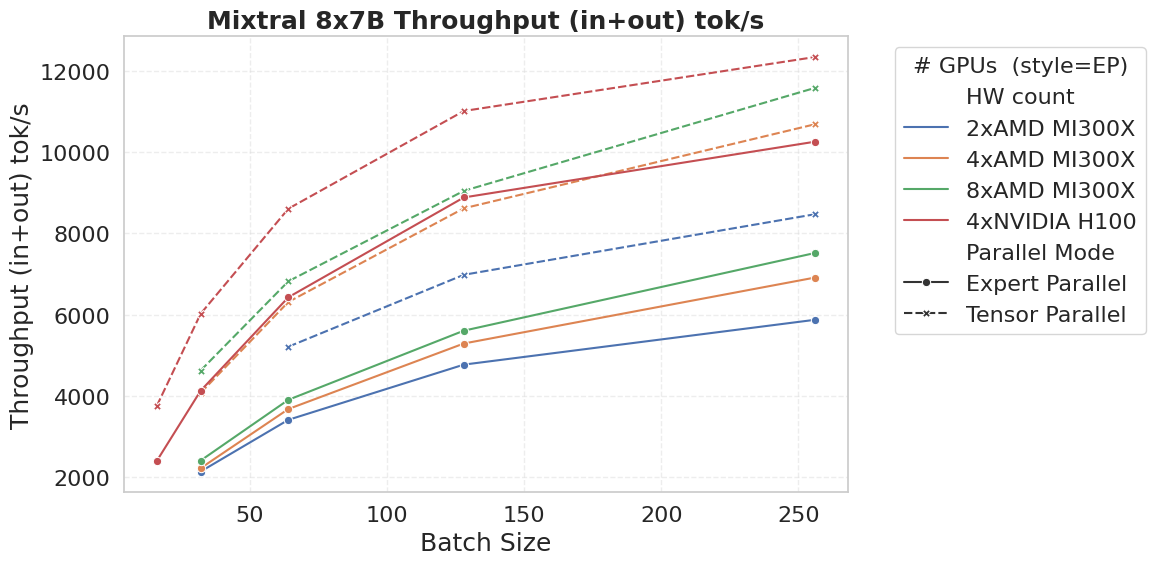

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


Saved figure to ./Plots/Llama 4 Scout 17B 16E_ep_tp.pdf


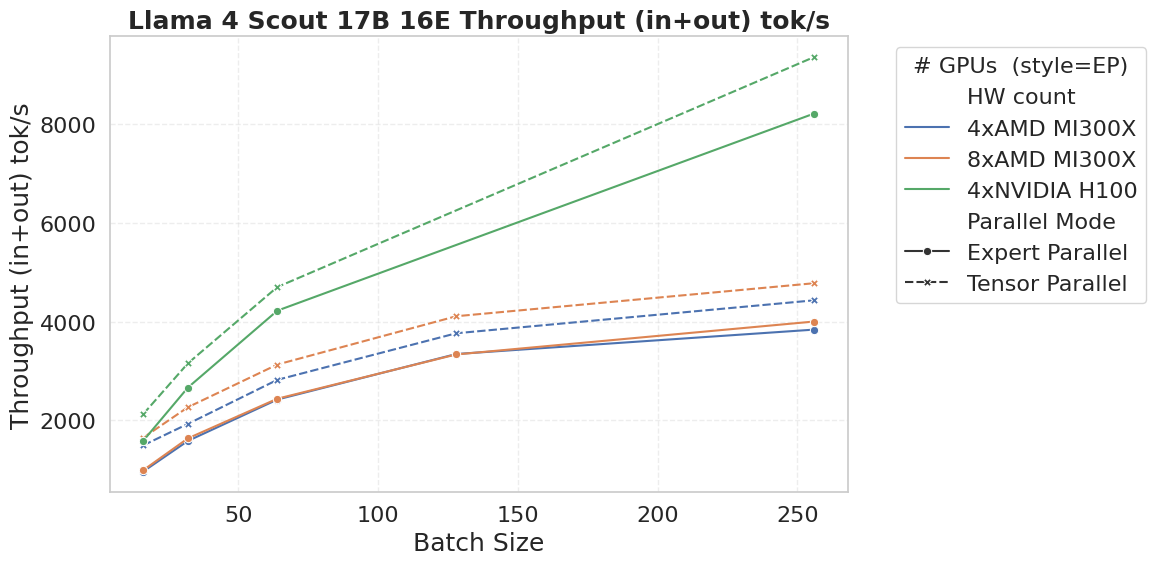

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


Saved figure to ./Plots/Mixtral 8x22B_ep_tp.pdf


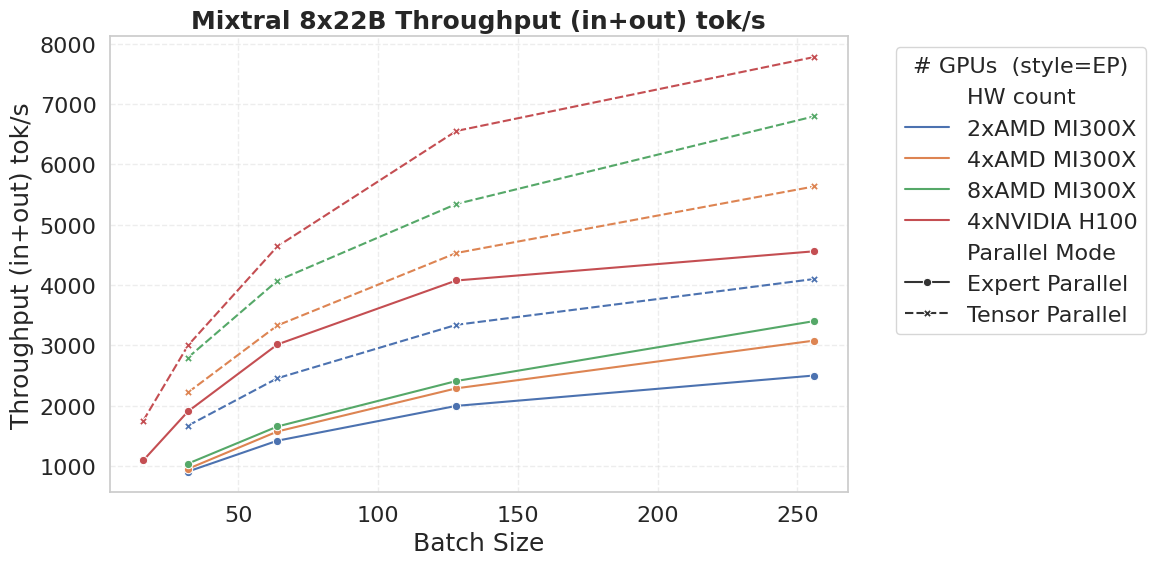

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


Saved figure to ./Plots/Qwen3 235B A22B_ep_tp.pdf


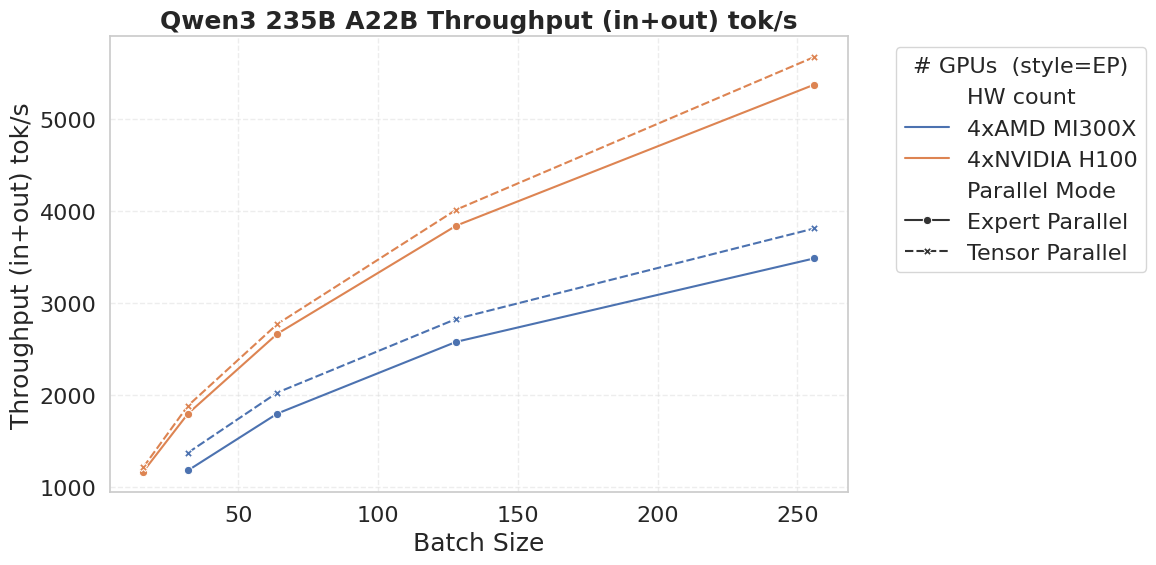

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


Saved figure to ./Plots/DeepSeek R1 0528_ep_tp.pdf


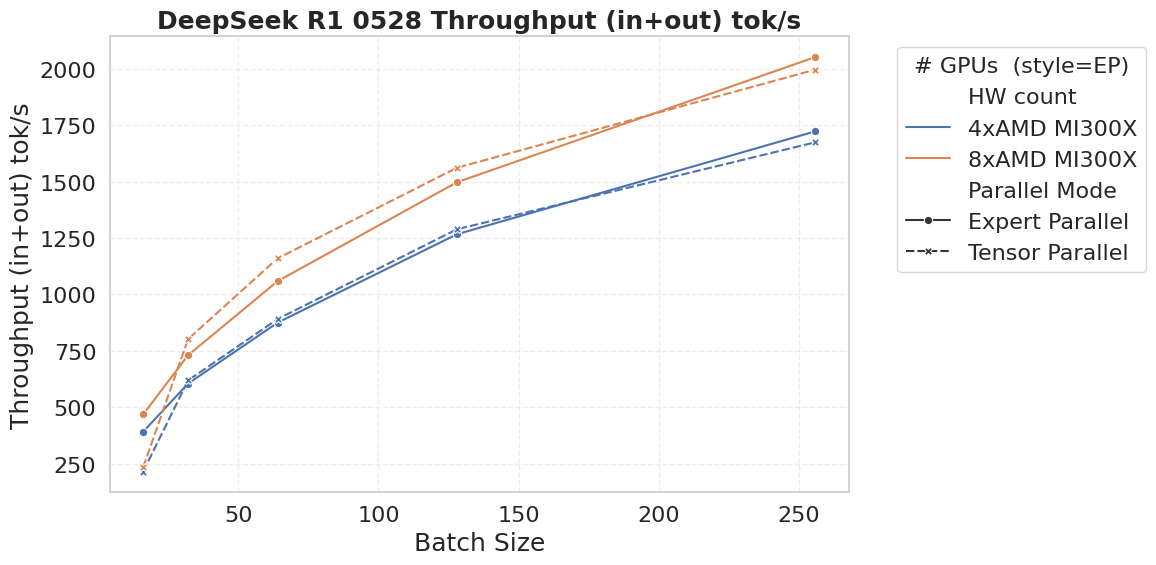

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


Saved figure to ./Plots/Mixtral 8x7B_ep_tp.pdf


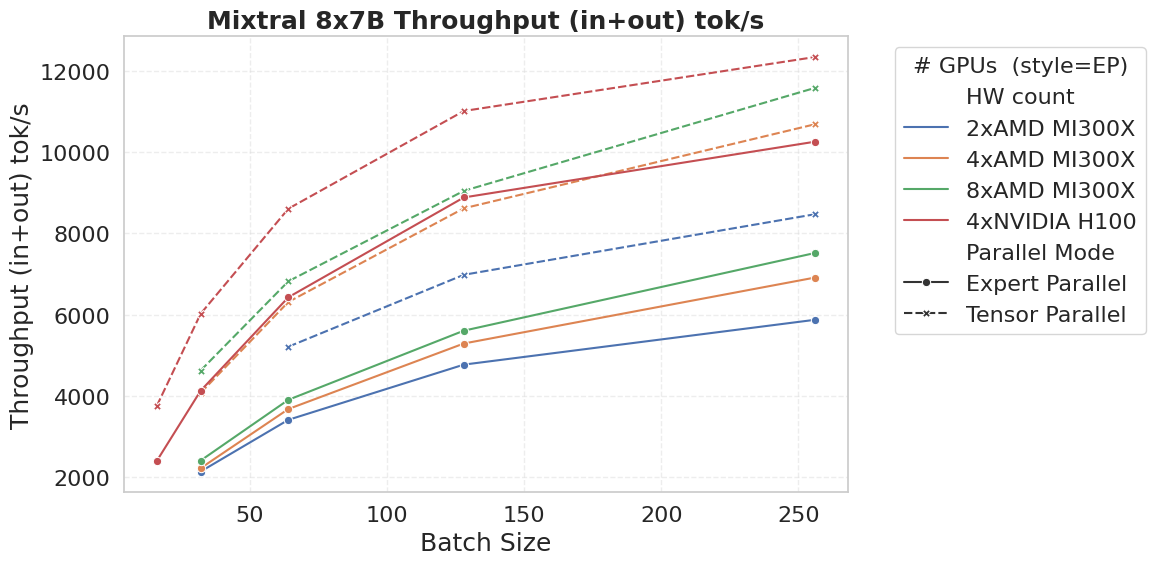

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


Saved figure to ./Plots/Llama 4 Scout 17B 16E_ep_tp.pdf


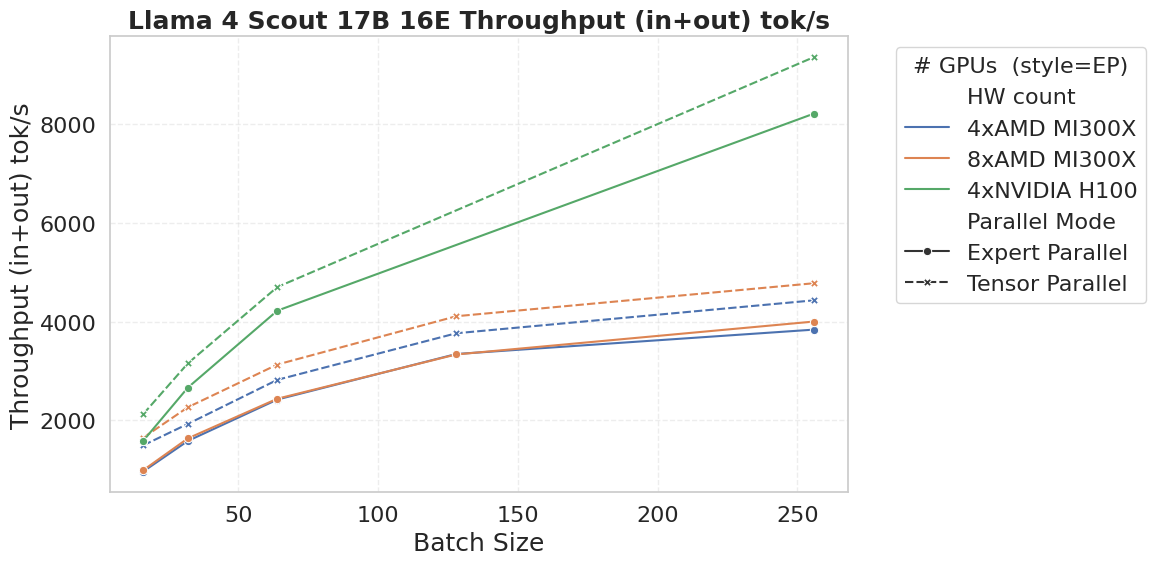

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


Saved figure to ./Plots/Mixtral 8x22B_ep_tp.pdf


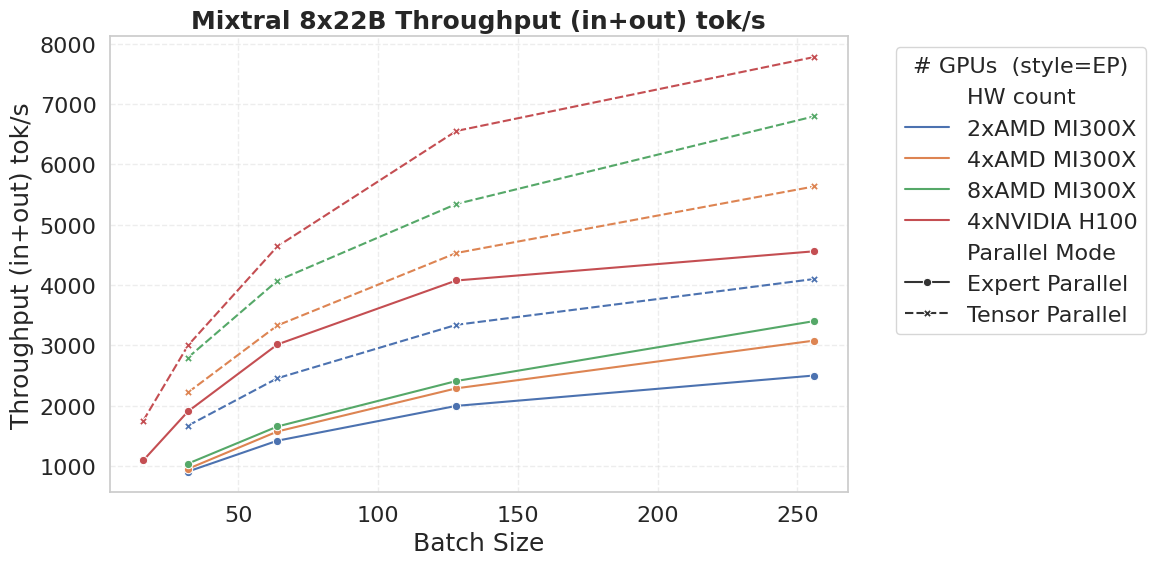

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


Saved figure to ./Plots/Qwen3 235B A22B_ep_tp.pdf


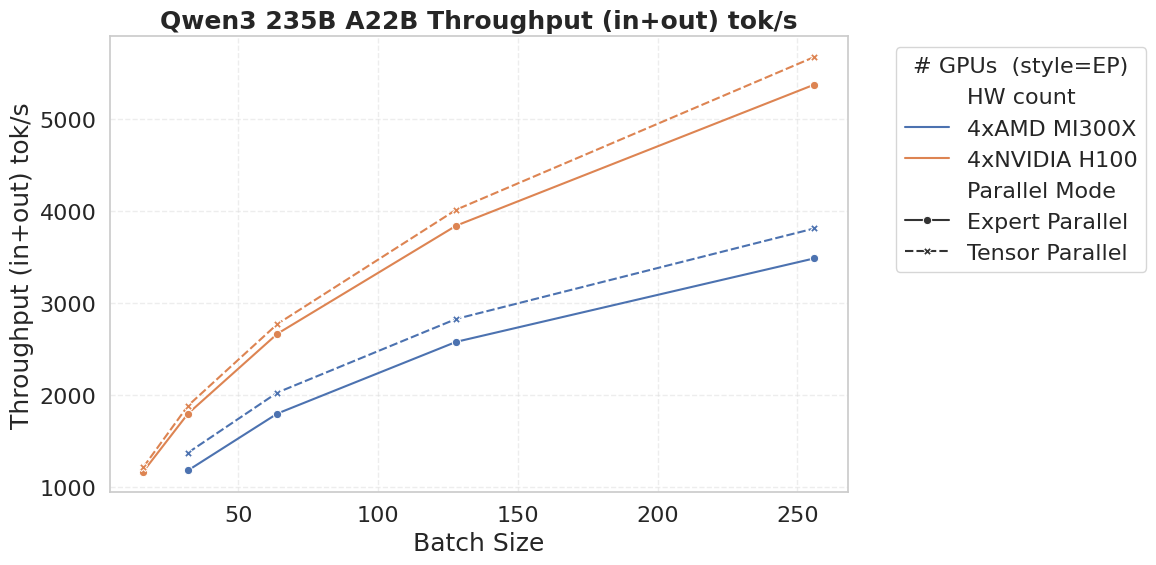

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


Saved figure to ./Plots/DeepSeek R1 0528_ep_tp.pdf


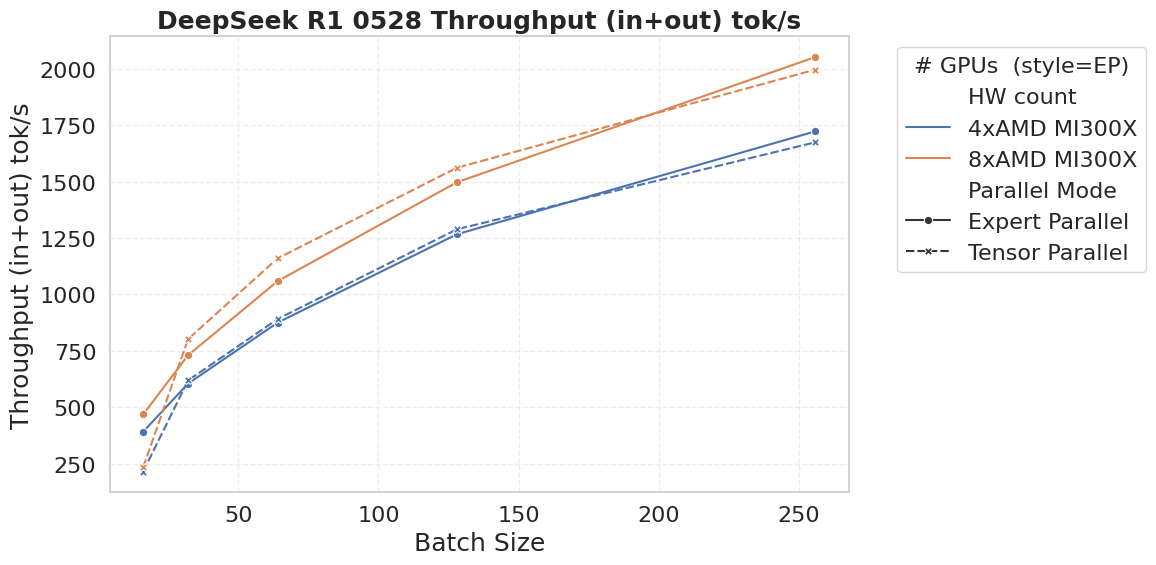

In [8]:
for hw in hw_types:
    for model_name in models:
        tp_vs_ep_metric(df, model_name, 'Throughput (in+out) tok/s', palette='deep', save=True)

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


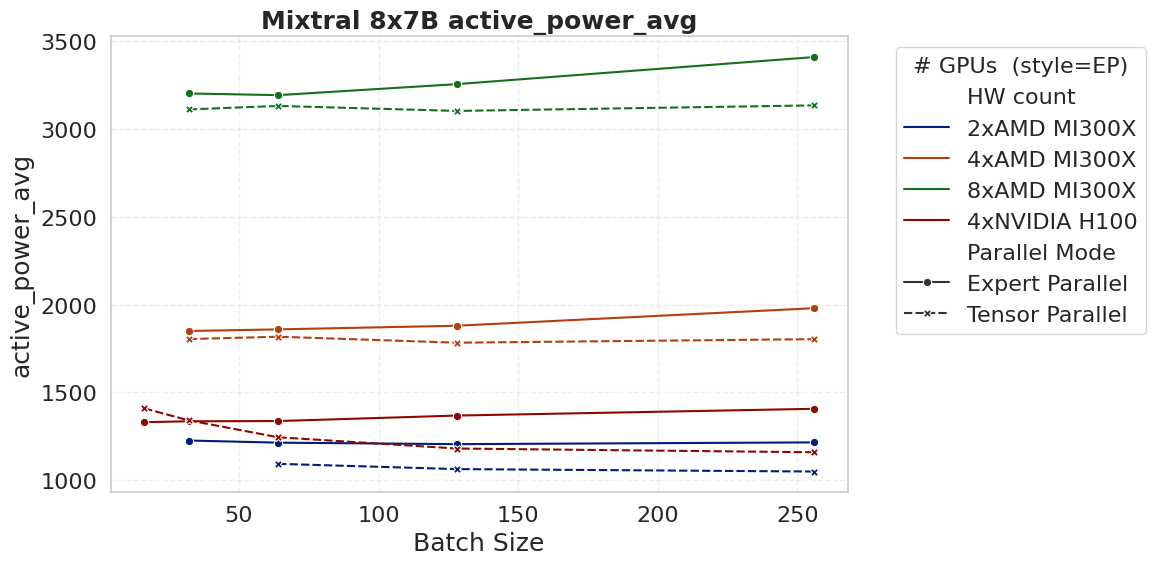

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


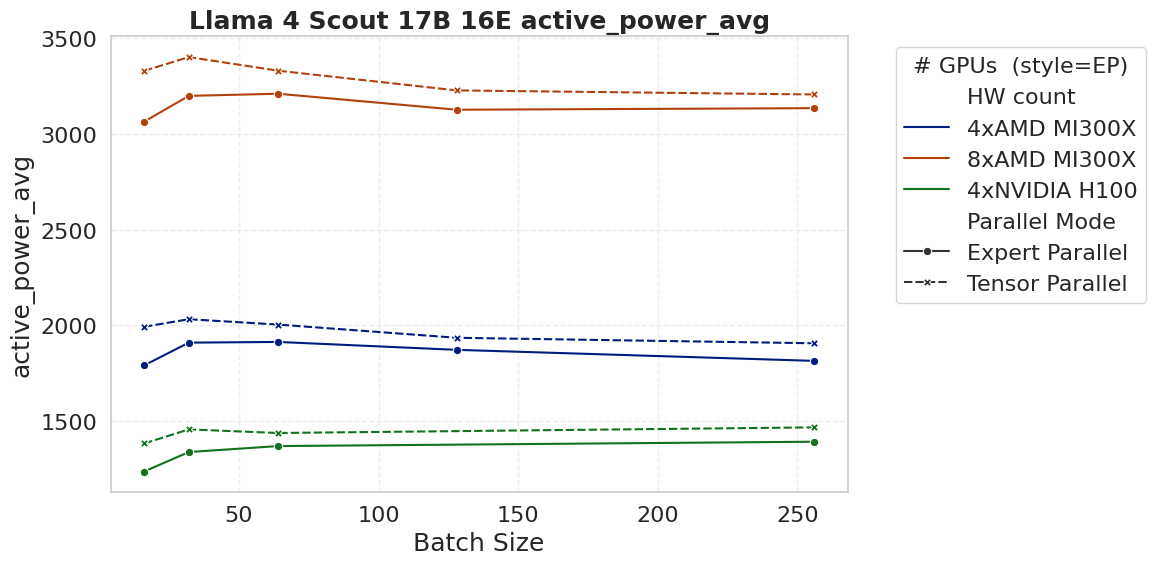

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


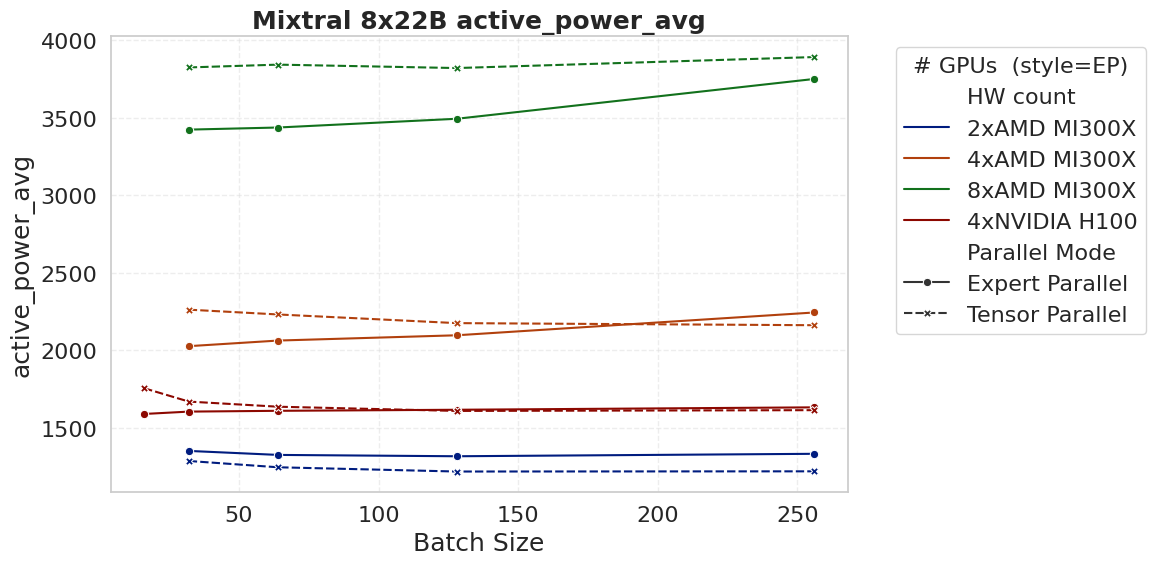

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


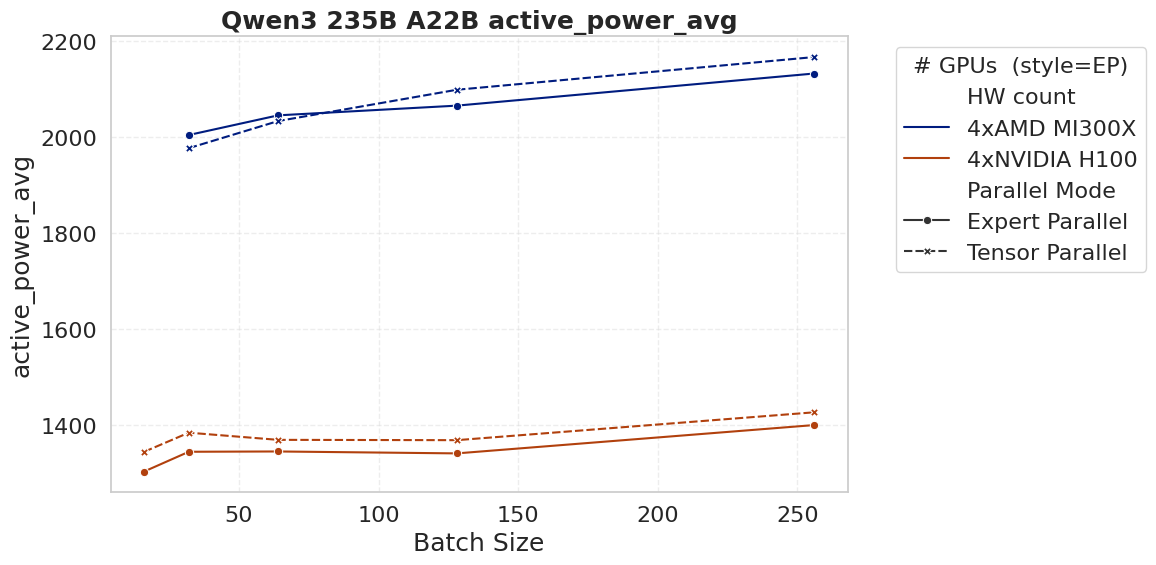

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


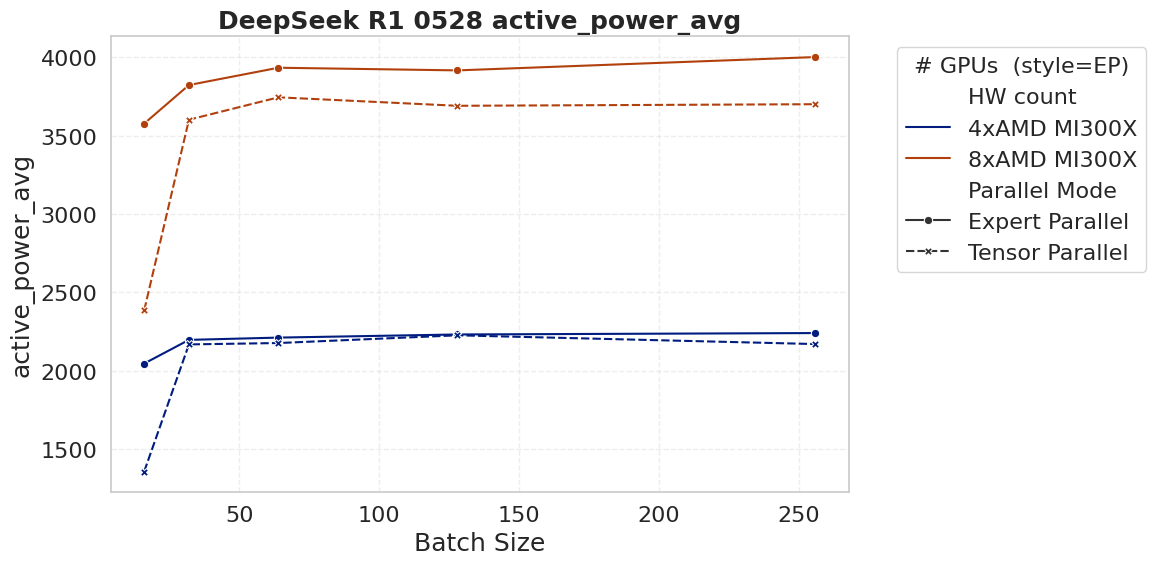

In [10]:
for model_name in models:
        tp_vs_ep_metric(df, model_name, 'active_power_avg', palette='dark')

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


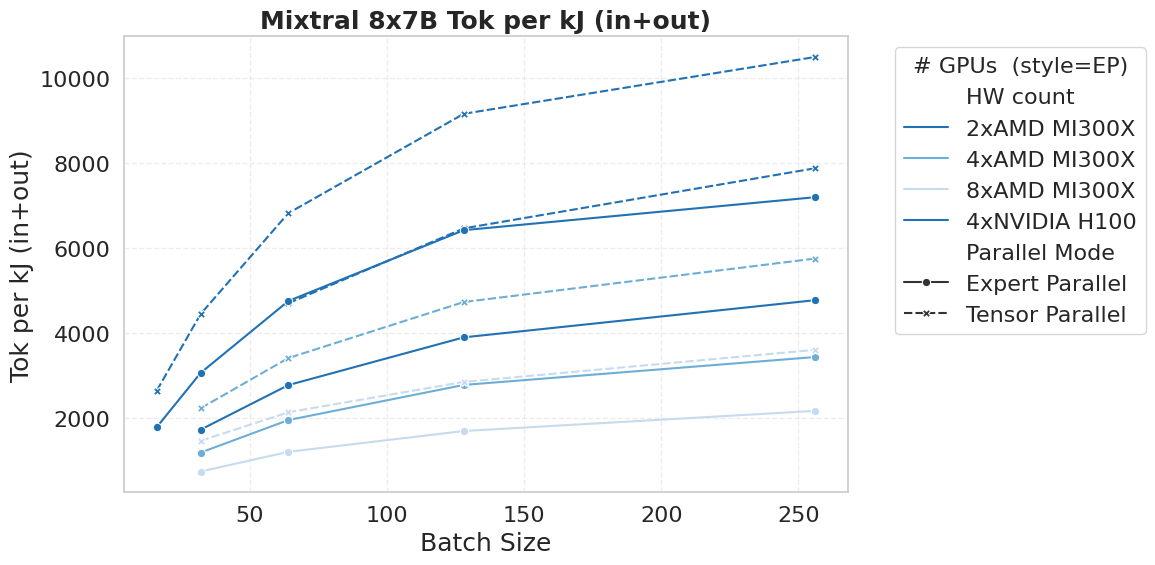

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


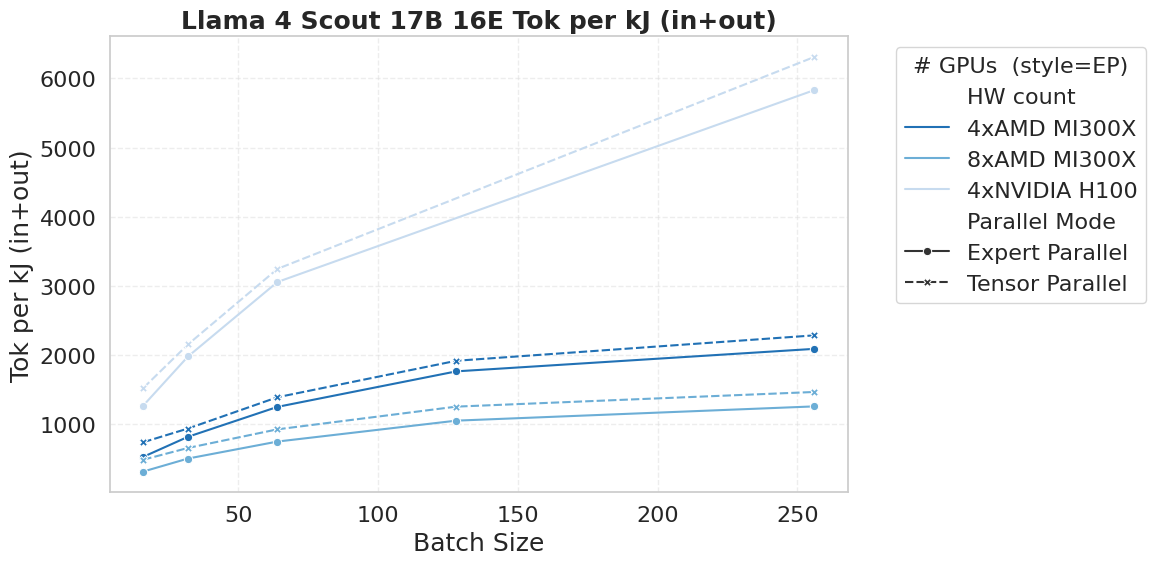

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


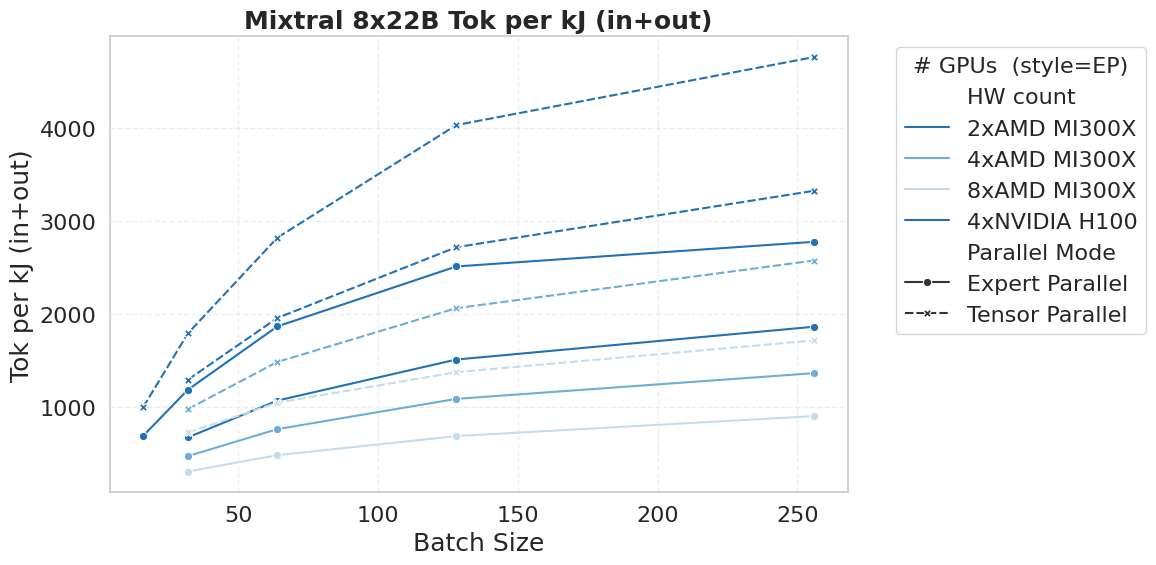

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(


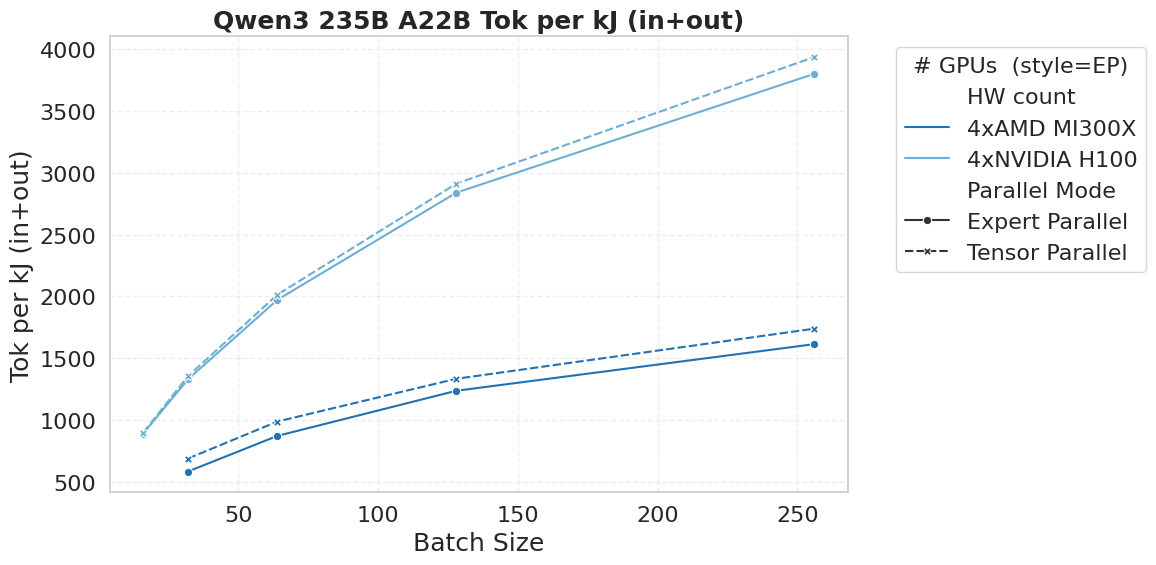

/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/home/gbrun/LLM_Inference_Power/Results/plot_utils.py:717: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(


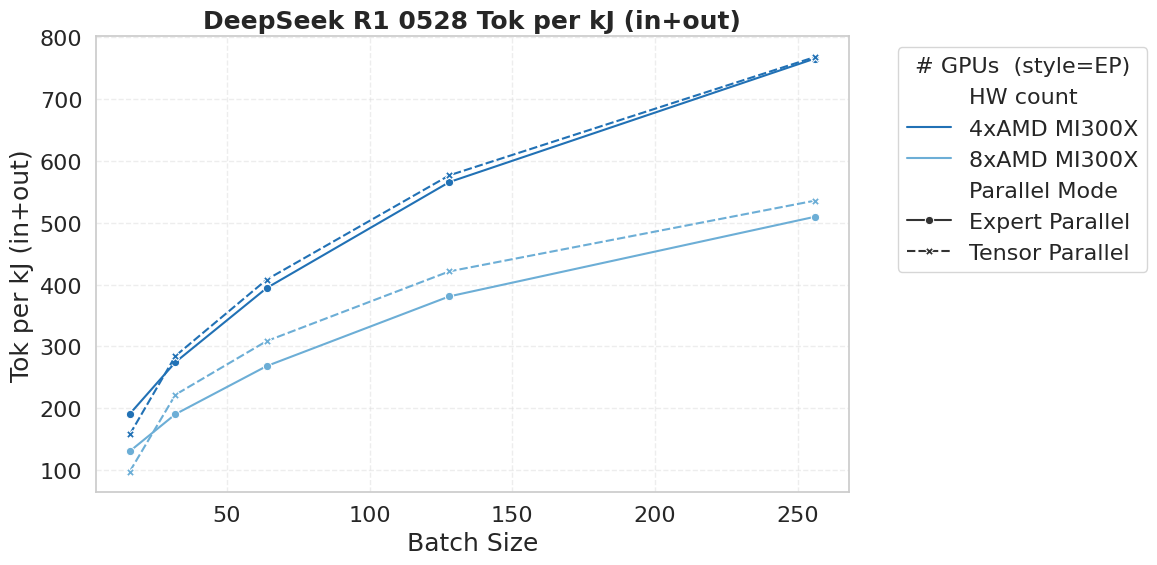

In [42]:
for model_name in models:
        tp_vs_ep_metric(df, model_name, 'Tok per kJ (in+out)', palette=palette_efficiency)

In [14]:
def compare(df, model_name, metric):
    # filter the dataframe
    model_df = df[df['Model Name'] == model_name].copy()

    # build a per-row “config” string (fixed quoting and using ds_df, not df)
    model_df["config"] = model_df.apply(
        lambda r: f"{r['Hardware type']} EP: {r['EP Size']}" if r['EP Size'] > 1 else f"{r['Hardware type']} TP: {r['TP Size']}", axis=1
    )

    for hw in model_df['Hardware type'].unique():
        print(f"Hardware: {hw} {metric} for {model_name}")
        for gpus in model_df['Total GPUs'].unique():
            print(f"Total GPUs: {gpus}")
            for bs in model_df['Batch Size'].unique():
                filtered_df = model_df[(model_df['Batch Size'] == bs) & (model_df['Hardware type'] == hw) & (model_df['Total GPUs'] == gpus)]
                if not filtered_df.empty:
                    tp = filtered_df[filtered_df['EP Size'] == 1][metric].mean()
                    ep = filtered_df[filtered_df['EP Size'] > 1][metric].mean()
                    print(f"BS = {bs}, TP: {tp}, EP: {ep} TP/EP: {tp/ep if ep != 0 else 'N/A'}")



for model_name in models:
    compare(df, model_name, 'Tok per kJ (in+out)')

Hardware: AMD Instinct MI300X Tok per kJ (in+out) for mistralai/Mixtral-8x7B-Instruct-v0.1
Total GPUs: 2
BS = 32.0, TP: nan, EP: 1732.550870353271 TP/EP: nan
BS = 64.0, TP: 4706.727463943424, EP: 2781.26495653407 TP/EP: 1.6922974033401004
BS = 128.0, TP: 6469.421217430391, EP: 3904.4765260604045 TP/EP: 1.6569240906560148
Total GPUs: 4
BS = 32.0, TP: 2236.478666178575, EP: 1193.1047801318769 TP/EP: 1.8745031479392544
BS = 64.0, TP: 3417.155642682681, EP: 1958.1934751293231 TP/EP: 1.745055167471133
BS = 128.0, TP: 4736.0493471944965, EP: 2784.8547081569495 TP/EP: 1.7006450402322322
Total GPUs: 8
BS = 32.0, TP: 1470.4633148287771, EP: 746.7372047687296 TP/EP: 1.9691844807494105
BS = 64.0, TP: 2141.40400406307, EP: 1210.1964113651893 TP/EP: 1.7694681490977244
BS = 128.0, TP: 2856.223386252662, EP: 1700.0487120369608 TP/EP: 1.6800832623380528
Hardware: NVIDIA H100 80GB HBM3 Tok per kJ (in+out) for mistralai/Mixtral-8x7B-Instruct-v0.1
Total GPUs: 2
Total GPUs: 4
BS = 32.0, TP: 4454.295220281